In [1]:
#PARTE I: FAMILIARIZANDNOS CON LA EPH Y LIMPIEZA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np

EPH2025 = pd.read_excel(r"C:\Users\Usuario\Downloads\usu_individual_T125.xlsx")

EPH2005 = pd.read_stata(r"C:\Users\Usuario\Downloads\Individual_t105.dta")

print(EPH2025.head())
print(EPH2005.head())

#Vamos a ver por cada región cuántos datos hay para poder elegir

# 2025
conteo_2025 = EPH2025['REGION'].value_counts()
print("2025",conteo_2025)

# 2005
conteo_2005 = EPH2005['region'].value_counts()
print("2005",conteo_2005)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Usuario\\Downloads\\usu_individual_T125.xlsx'

In [3]:
#2.A

In [4]:
# Como nombraron distinto a las regiones en los dos años, vemos como se llaman así filtramos bien
print(EPH2025['REGION'].unique())
#está como 43

# Lo mismo para 2005
print(EPH2005['region'].unique())
#está como Pampeana

#nos aseguramos que estén las dos en minúsculas para poder unir las bases
EPH2025.columns = EPH2025.columns.str.lower()
EPH2005.columns = EPH2005.columns.str.lower()

#nos quedamos solo con pampeana
# Filtrar Región Pampeana en 2005
EPH2005_pampeana = EPH2005[EPH2005['region'] == 'Pampeana'].copy()

# Filtrar Región Pampeana en 2025 (código 43)
EPH2025_pampeana = EPH2025[EPH2025['region'] == 43].copy()

# Agregar columna 'anio' para diferenciar
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

# Unimos pampeana de las dos años
EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

[43 41 42 40 44  1]
['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']


In [5]:
# 2.B

In [6]:
#guardamos las variables con las que nos quedamos en esta lista
variables = [
   "codusu","region", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",  
    "ch15", "itf",  "ch03", "p47t", "p21", "pp3e_tot", "pp3f_tot"
]

EPH2005_filtrado = EPH2005[variables]

EPH2025_filtrado = EPH2025[variables]

In [7]:
#vemos el tipo de datos que hay en cada año
print(EPH2005_filtrado.dtypes)
print(EPH2025_filtrado.dtypes)

#despues de esto vemos que mientras tenemos variables category en 2005, en 2025 están en int64 o float64, vamos a poner todo en un mismo formato

codusu        object
region      category
ch04        category
ch06        category
ch07        category
ch08        category
nivel_ed    category
estado      category
cat_inac    category
ipcf         float64
ch09        category
cat_ocup    category
ch15        category
itf          float64
ch03        category
p47t         float64
p21          float64
pp3e_tot     float64
pp3f_tot     float64
dtype: object
codusu       object
region        int64
ch04          int64
ch06          int64
ch07          int64
ch08        float64
nivel_ed      int64
estado        int64
cat_inac      int64
ipcf        float64
ch09          int64
cat_ocup      int64
ch15          int64
itf           int64
ch03          int64
p47t        float64
p21           int64
pp3e_tot    float64
pp3f_tot    float64
dtype: object


In [8]:
# ahora, para arreglar y que tengan el mismo formato en ambas bases de dato, nos fijamos con la función .unique() en cada
#variable para armar un diccionari para cada una variable y después cambiar su valor para que esten iguales
mapping_ch04 = {
    'Varón': 1,
    'Mujer': 2
}

mapping_ch07 = {
    'Unido': 1,
    'Casado': 2,
    'Separado o divorciado': 3,
    'Viudo': 4,
    'Soltero': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch08 = {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': pd.NA,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicos': 123
}
mapping_nivel_ed = {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./Nr.': pd.NA
}
mapping_estado = {
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4
}
mapping_cat_inac = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7,
    0.0: 0
}
mapping_ch15 = {
    'En esta localidad': 1,
    'En otra localidad': 2,
    'En otra provincia (especificar)': 3,
    'En un país limítrofe': 4,
    'En otro país': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch09 = {
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3,
    'Ns./Nr.': pd.NA
}
mapping_ch03 = {
    'Jefe': 1,
    'Cónyuge/Pareja': 2,
    'Hijo/Hijastro': 3,
    'Yerno/Nuera': 4,
    'Nieto': 5,
    'Madre/Padre': 6,
    'Suegro': 7,
    'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}
mapping_cat_ocup = {
    'Patrón': 1,
    'Cuenta propia': 2,
    'Obrero o empleado': 3,
    'Trabajador familiar sin remuneración': 4,
    0.0 : 0
}

def limpiar_edad(x):
    if isinstance(x, str):
        if 'Menos de 1' in x:
            return 0
        elif '98' in x:
            return 99
        else:
            return pd.NA
    else:
        return int(x)

EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
EPH2005_filtrado.loc[:, 'ch07'] = EPH2005_filtrado['ch07'].map(mapping_ch07).astype('Int64')
EPH2005_filtrado.loc[:, 'ch08'] = EPH2005_filtrado['ch08'].map(mapping_ch08).astype('Int64')
EPH2005_filtrado.loc[:, 'nivel_ed'] = EPH2005_filtrado['nivel_ed'].map(mapping_nivel_ed).astype('Int64')
EPH2005_filtrado.loc[:, 'estado'] = EPH2005_filtrado['estado'].map(mapping_estado).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_inac'] = EPH2005_filtrado['cat_inac'].map(mapping_cat_inac).astype('Int64')
EPH2005_filtrado.loc[:, 'ch15'] = EPH2005_filtrado['ch15'].map(mapping_ch15).astype('Int64')
EPH2005_filtrado.loc[:, 'ch09'] = EPH2005_filtrado['ch09'].map(mapping_ch09).astype('Int64')
EPH2005_filtrado.loc[:, 'ch03'] = EPH2005_filtrado['ch03'].map(mapping_ch03).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_ocup'] = EPH2005_filtrado['cat_ocup'].map(mapping_cat_ocup).astype('Int64')

#Decidimos no considerar los 9 como Nan. Los consideramos una respuesta más.

# Vemos cambios
print(EPH2005_filtrado.head(10))
print(EPH2005_filtrado.dtypes)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25484\3588943942.py:99: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
 ...
 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25484\3588943942.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[80, 26, 27,  0, 71, 54, 54, 27, 20, 18,
 ...
  8,  5,  3, 41, 44, 16, 12, 43, 26,  5]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
C:\Users\

     codusu             region  ch04  ch06  ch07  ch08  nivel_ed  estado  \
0  125098    Gran Buenos Aires     1    80     4     1         3       3   
1  125188    Gran Buenos Aires     1    26     2     4         4       1   
2  125188    Gran Buenos Aires     2    27     2     4         6       3   
3  125188    Gran Buenos Aires     2     0     5     4         7       4   
4  125242    Gran Buenos Aires     2    71     4     1         2       3   
5  125436    Gran Buenos Aires     1    54     2     1         4       1   
6  125436    Gran Buenos Aires     2    54     2     1         4       3   
7  125436    Gran Buenos Aires     2    27     5     1         4       3   
8  125436    Gran Buenos Aires     1    20     5     1         3       2   
9  125436    Gran Buenos Aires     2    18     5     1         5       3   

   cat_inac    ipcf  ch09  cat_ocup  ch15     itf  ch03    p47t     p21  \
0         1   583.0     1         0     1   583.0     1   583.0     0.0   
1         0  

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25484\3588943942.py:108: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[1, 1, 2, 3, 1, 1, 2, 3, 3, 3,
 ...
 3, 3, 3, 1, 2, 3, 3, 1, 2, 3]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch03'] = EPH2005_filtrado['ch03'].map(mapping_ch03).astype('Int64')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25484\3588943942.py:109: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[0, 2, 0, 0, 0, 2, 0, 0, 3, 0,
 ...
 0, 0, 0, 3, 0, 0, 0, 3, 3, 0]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'cat_ocup'] = EPH2005_filtrado['cat_ocup'].map(mapping_cat_ocup).astype('Int64')


In [9]:
# Columnas categóricas que ya son números significativos
categ_numericas = ["ch04","ch03","ch06","ch07","ch08","ch09","ch15",
                   "nivel_ed","estado","cat_inac","cat_ocup"]

# Columnas float
float_cols = ["ipcf","itf","p47t","p21"]

# Convertimos categóricas a Int64
for col in categ_numericas:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')

# Convertimos tambie´n a los floats
for col in float_cols:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype(float)
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype(float)

# Revisamos tipos
print("EPH2005 (Región Pampeana):")
print(EPH2005_filtrado.dtypes)
print("\nEPH2025 (Región Pampeana):")
print(EPH2025_filtrado.dtypes)

#Ahora vemos que quedaron iguales en tipos de datos, menos región que vamos a 
#quedarnos solo con región pampeana antes de unir las bases

EPH2005 (Región Pampeana):
codusu        object
region      category
ch04           Int64
ch06           Int64
ch07           Int64
ch08           Int64
nivel_ed       Int64
estado         Int64
cat_inac       Int64
ipcf         float64
ch09           Int64
cat_ocup       Int64
ch15           Int64
itf          float64
ch03           Int64
p47t         float64
p21          float64
pp3e_tot     float64
pp3f_tot     float64
dtype: object

EPH2025 (Región Pampeana):
codusu       object
region        int64
ch04          Int64
ch06          Int64
ch07          Int64
ch08          Int64
nivel_ed      Int64
estado        Int64
cat_inac      Int64
ipcf        float64
ch09          Int64
cat_ocup      Int64
ch15          Int64
itf         float64
ch03          Int64
p47t        float64
p21         float64
pp3e_tot    float64
pp3f_tot    float64
dtype: object


C:\Users\Usuario\AppData\Local\Temp\ipykernel_25484\1602473912.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25484\1602473912.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25484\1602473912.py:18: SettingWithCopyWarning

In [10]:
# Antes de unir las bases, vamos a chequear valores negativos 

# Definimos la lista exacta de variables que quieres revisar.
variables_a_revisar = ['ipcf', 'ch15', 'itf', 'p47t', 'p21']

print("--- Conteo de valores negativos en EPH 2005 ---")
# Filtramos el DataFrame para quedarnos solo con las filas donde cualquier
# valor en las columnas especificadas es negativo, y luego contamos.
negativos_2005 = EPH2005_filtrado[variables_a_revisar][EPH2005_filtrado[variables_a_revisar] < 0].count()
print(negativos_2005)


print("\n--- Conteo de valores negativos en EPH 2025 ---")
# Repetimos el mismo proceso para la base de datos de 2025.
negativos_2025 = EPH2025_filtrado[variables_a_revisar][EPH2025_filtrado[variables_a_revisar] < 0].count()
print(negativos_2025)


--- Conteo de valores negativos en EPH 2005 ---
ipcf    0
ch15    0
itf     0
p47t    0
p21     0
dtype: int64

--- Conteo de valores negativos en EPH 2025 ---
ipcf       0
ch15       0
itf        0
p47t    5405
p21     3839
dtype: int64


In [11]:
variables = [
    "codusu", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",
    "ch15", "itf", "ch03", "p47t", "p21", "pp3e_tot", "pp3f_tot"
]

# Para 2005: solo filtramos por región Pampeana y seleccionamos las variables.
# No se limpian negativos porque, como se ve en el codigo anterior, para el año 2005, no hay.
EPH2005_pampeana = EPH2005_filtrado.loc[
    EPH2005_filtrado['region'] == "Pampeana",
    variables
].copy()

# Para 2025: aplicamos TODOS los filtros a la vez usando el operador '&' (y).
# Condición 1: La región debe ser 43 (Pampeana).
# Condición 2: El ingreso p47t debe ser mayor o igual a 0.
# Condición 3: El ingreso p21 debe ser mayor o igual a 0.
EPH2025_pampeana = EPH2025_filtrado.loc[
    (EPH2025_filtrado['region'] == 43) &     
    (EPH2025_filtrado['p47t'] >= 0) &   
    (EPH2025_filtrado['p21'] >= 0),           
    variables
].copy()

# Ahora sí, agregamos año y unimos
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

In [12]:
EPH_total.head(5)

,codusu,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21,pp3e_tot,pp3f_tot,anio
0,125082,1,28,2,4,2,1,0,280.0,1,3,1,840.0,1,500.0,500.0,72.0,0.0,2005
1,125082,2,30,2,1,6,1,0,280.0,1,3,1,840.0,2,340.0,340.0,30.0,12.0,2005
2,125082,1,4,5,1,7,4,5,280.0,2,0,1,840.0,3,0.0,0.0,0.0,0.0,2005
3,125283,1,66,2,2,3,1,0,1075.0,1,3,1,4300.0,1,1500.0,600.0,0.0,0.0,2005
4,125283,2,60,2,2,3,1,0,1075.0,1,3,1,4300.0,2,1900.0,1400.0,0.0,0.0,2005


In [13]:
#EJERCICIO 5

In [14]:
# Contar cuántas personas respondieron estado respondieron == 0 por año
respondieron_estado0 = EPH_total[EPH_total["estado"] == 0].groupby("anio").size()

print("Cantidad de personas que no respondieron su condición de actividad por año:")
print(respondieron_estado0)

Cantidad de personas que no respondieron su condición de actividad por año:
anio
2005    24
dtype: int64


In [15]:
# Aca lo que pasó fue que nos dimos cuenta que no aparecían los estado == 0 del 2025. Nos fijamos en donde exactamente habíamos perdido esos datos
conteo_inicial_2025 = (EPH2025_filtrado['estado'] == 0).sum()

#efectivamentem antes de unir las bases de datos habían 75 personas con estado == 0
print(f"En el DataFrame 'EPH2025_filtrado' original, hay {conteo_inicial_2025} filas con estado == 0.")

En el DataFrame 'EPH2025_filtrado' original, hay 75 filas con estado == 0.


In [16]:
# Para verificar, creamos un data frame con estas variables
df_estado0_2025 = EPH2025_filtrado[EPH2025_filtrado['estado'] == 0]

# De esas 75, ¿cuántas son pampeanas?
filas_region_ok = (df_estado0_2025['region'] == 43).sum()
#11 eran pampeanas

# Prueba 2: ¿Cuántas de estas 75 filas tienen un ingreso p47t >= 0?
filas_p47t_ok = (df_estado0_2025['p47t'] >= 0).sum()
#NINGUNA tenía el p47t (monto total de ingreso individual percibido en el mes de referencia) <= 0
#entonces cuando quitamos estos sujetos, los perdimos de nuestra pase de datos, pero eran 11 en definitiva

# Prueba 3: ¿Cuántas de estas 75 filas tienen un ingreso p21 >= 0?
filas_p21_ok = (df_estado0_2025['p21'] >= 0).sum()
#Todas tenían p21 (monto de ingreso de la ocupación principal)>= 0

In [17]:
# Vemos itf > 0
respondieron = EPH_total[EPH_total['itf'] > 0].copy()
# Vemos itf = 0 (es decir, no respondieron)
norespondieron = EPH_total[EPH_total['itf'] == 0].copy()
print("Número de observaciones que respondieron ITF:", respondieron.shape[0])
print("Número de observaciones que no respondieron ITF:", norespondieron.shape[0])

Número de observaciones que respondieron ITF: 23821
Número de observaciones que no respondieron ITF: 2528


In [18]:
# Separar respondieron por año
respondieron_2005 = respondieron[respondieron['anio'] == 2005].copy()
respondieron_2025 = respondieron[respondieron['anio'] == 2025].copy()

# Separar norespondieron por año
norespondieron_2005 = norespondieron[norespondieron['anio'] == 2005].copy()
norespondieron_2025 = norespondieron[norespondieron['anio'] == 2025].copy()

# Revisar dimensiones
print("Respondieron 2005:", respondieron_2005.shape)
print("Respondieron 2025:", respondieron_2025.shape)
print("No respondieron 2005:", norespondieron_2005.shape)
print("No respondieron 2025:", norespondieron_2025.shape)

Respondieron 2005: (14481, 19)
Respondieron 2025: (9340, 19)
No respondieron 2005: (170, 19)
No respondieron 2025: (2358, 19)


In [19]:
#EJERCICIO 6

In [20]:
# Cargamos la tabla, si no la encuentra nos dice que no se encontró (el try/except)
try:
    df_equiv = pd.read_excel(r"C:\Users\Usuario\Downloads\tabla_adulto_equiv.xlsx", skiprows=4, nrows=23)
except FileNotFoundError:
    print("Error: El archivo 'tabla_adulto_equiv.xlsx' no se encontró. Revisa la ruta.")
    # Si usas Jupyter o Google Colab, es mejor salir de la celda si hay error.
    # Si es un script, podrías usar exit()
    raise

# Limpiamos y preparamos la tabla con las columnas que nos piden. Nos fijemos que todo tenga el formato correcto
df_equiv.columns = ['edad_str', 'Mujeres', 'Varones']
df_equiv_long = pd.melt(df_equiv, id_vars='edad_str', value_vars=['Mujeres', 'Varones'],
                        var_name='sexo_str', value_name='adulto_equiv')
df_equiv_long['ch04'] = df_equiv_long['sexo_str'].map({'Varones': 1, 'Mujeres': 2}).astype(int)
df_equiv_long['ch06'] = df_equiv_long['edad_str'].str.extract('(\d+)').astype(int)
df_equiv_long.loc[df_equiv_long['edad_str'] == 'Menor de 1 año', 'ch06'] = 0
df_equiv_final = df_equiv_long[['ch04', 'ch06', 'adulto_equiv']].dropna().sort_values(by=['ch04', 'ch06'])


# Preparamos el data frame respondieorn
# Creamos la base con ITF > 0 a partir de tu EPH_total
# Esto filtra los hogares que no informaron ingresos.
respondieron = EPH_total[EPH_total['itf'] > 0].copy()

# Nos aseguramos de que no haya nulos en las columnas clave para el cálculo y de que tengan el tipo de dato correcto.
columnas_clave = ['codusu', 'ch06', 'ch04', 'itf']
respondieron = respondieron.dropna(subset=columnas_clave)
respondieron['ch06'] = respondieron['ch06'].astype(int)
respondieron['ch04'] = respondieron['ch04'].astype(int)


# asignamos el adult equivs a cada persona
# Función de búsqueda que encuentra el valor de adulto equivalente
# para cada persona según su sexo y rango de edad.
def obtener_adulto_equiv(fila, tabla_equivalencias):
    sexo_persona = fila['ch04']
    edad_persona = fila['ch06']
    
    # Filtramos la tabla de equivalencias por el sexo de la persona
    tabla_sexo = tabla_equivalencias[tabla_equivalencias['ch04'] == sexo_persona]
    
    # Encuentra la fila correspondiente al rango de edad
    # Se toma el último valor de edad que sea menor o igual a la edad de la persona
    fila_equivalencia = tabla_sexo[tabla_sexo['ch06'] <= edad_persona]
    
    if not fila_equivalencia.empty:
        return fila_equivalencia['adulto_equiv'].iloc[-1]
    else:
        # Si no lo encuentra (por ej. edad negativa), devuelve NaN
        return np.nan

# Aplicamos la función a cada fila del DataFrame
respondieron['adulto_equiv'] = respondieron.apply(
    obtener_adulto_equiv, 
    axis=1, 
    tabla_equivalencias=df_equiv_final
)
# Agrupamos hogar y ad_equiv
# Usamos groupby con 'anio' y 'codusu' para identificar  cada hogar.
# '.transform('sum')' calcula la suma de 'adulto_equiv' para cada grupo (hogar)
# y luego asigna ese mismo valor total a cada miembro del hogar.

print("\nAgrupando por hogar y calculando 'ad_equiv_hogar'...")
respondieron['ad_equiv_hogar'] = respondieron.groupby(['anio', 'codusu'])['adulto_equiv'].transform('sum')
print("¡Cálculo de 'ad_equiv_hogar' completado!")


#  Vemos los primeros 10 de la tabla, seleccionando columnas relevantes.
# Deberías ver que las personas con el mismo 'codusu' y 'anio' tienen el mismo valor en 'ad_equiv_hogar'.
print(respondieron[['anio', 'codusu', 'ch04', 'ch06', 'adulto_equiv', 'ad_equiv_hogar']].head(10))


Agrupando por hogar y calculando 'ad_equiv_hogar'...
¡Cálculo de 'ad_equiv_hogar' completado!
   anio    codusu  ch04  ch06  adulto_equiv  ad_equiv_hogar
0  2005  125082       1    28          1.02            2.34
1  2005  125082       2    30          0.77            2.34
2  2005  125082       1     4          0.55            2.34
3  2005  125283       1    66          0.83            3.63
4  2005  125283       2    60          0.76            3.63
5  2005  125283       1    29          1.02            3.63
6  2005  125283       1    26          1.02            3.63
7  2005  125409       1    33          1.00            2.13
8  2005  125409       2    25          0.76            2.13
9  2005  125409       2     1          0.37            2.13


In [21]:
#EJERCICIO 7

In [22]:
# Definimos valores de la CBT
# Guardamos los valores de la canasta en variables para que el código sea más claro.
cbt_2005 = 205.07
cbt_2025 = 365177

# Creamos columna ingreso necesario
# Usamos np.where para aplicar un cálculo condicional basado en el año.
print("Calculando el ingreso necesario para cada hogar...")

respondieron['ingreso_necesario'] = np.where(
    respondieron['anio'] == 2005,                          
    respondieron['ad_equiv_hogar'] * cbt_2005,               
    respondieron['ad_equiv_hogar'] * cbt_2025                 
)

# Ejemplo para el año 2005
print(respondieron[respondieron['anio'] == 2005][['anio', 'ad_equiv_hogar', 'ingreso_necesario']].head())

# Ejemplo para el año 2025
print(respondieron[respondieron['anio'] == 2025][['anio', 'ad_equiv_hogar', 'ingreso_necesario']].head())

Calculando el ingreso necesario para cada hogar...
   anio  ad_equiv_hogar  ingreso_necesario
0  2005            2.34           479.8638
1  2005            2.34           479.8638
2  2005            2.34           479.8638
3  2005            3.63           744.4041
4  2005            3.63           744.4041
       anio  ad_equiv_hogar  ingreso_necesario
14651  2025            2.99         1091879.23
14652  2025            2.99         1091879.23
14653  2025            2.99         1091879.23
14654  2025            2.99         1091879.23
14655  2025            2.12          774175.24


In [23]:
#EJERCICIO 8

In [24]:
#Creamos columna pobe
# Al igual que en el inciso anterior usamos np.wherepara crear una columna basandonos en una condición 
# Condición: si el ingreso del hogar ('itf') es menor que su 'ingreso_necesario'.
# Valor si es verdadero: 1 (es pobre)
# Valor si es falso: 0 (no es pobre)

print("Creando la columna 'pobre'...")
respondieron['pobre'] = np.where(
    respondieron['itf'] < respondieron['ingreso_necesario'], 
    1, 
    0
)
print("¡Columna 'pobre' creada!")


# Calculamos cantidad y porcentaje de pobres
# Agrupamos el DataFrame por la columna 'anio'.
# Usamos .agg() para realizar múltiples cálculos a la vez sobre la columna "pobre":
#   - '"sum"nos da el total de pobres (porque suma todos los 1s).
#   - "count" nos da el total de personas en la muestra para ese año.

analisis_pobreza = respondieron.groupby('anio')['pobre'].agg(
    Cantidad_Pobres='sum', 
    Total_Personas='count'
)

# Calculamos el porcentaje dividiendo la cantidad de pobres por el total y multiplicando por 100
analisis_pobreza['Porcentaje_Pobreza'] = (analisis_pobreza['Cantidad_Pobres'] / analisis_pobreza['Total_Personas']) * 100


# Resultados
print(analisis_pobreza)
print(" Verificación de la columna 'pobre' (primeras 10 filas)")
print(respondieron[['anio', 'itf', 'ingreso_necesario', 'pobre']].head(10))

Creando la columna 'pobre'...
¡Columna 'pobre' creada!
      Cantidad_Pobres  Total_Personas  Porcentaje_Pobreza
anio                                                     
2005             4264           14481           29.445480
2025             3256            9340           34.860814
 Verificación de la columna 'pobre' (primeras 10 filas)
   anio     itf  ingreso_necesario  pobre
0  2005   840.0           479.8638      0
1  2005   840.0           479.8638      0
2  2005   840.0           479.8638      0
3  2005  4300.0           744.4041      0
4  2005  4300.0           744.4041      0
5  2005  4300.0           744.4041      0
6  2005  4300.0           744.4041      0
7  2005  1200.0           436.7991      0
8  2005  1200.0           436.7991      0
9  2005  1200.0           436.7991      0


In [25]:
#TP2 ---

In [26]:
#PARTE 1
#EJERCICIO 1

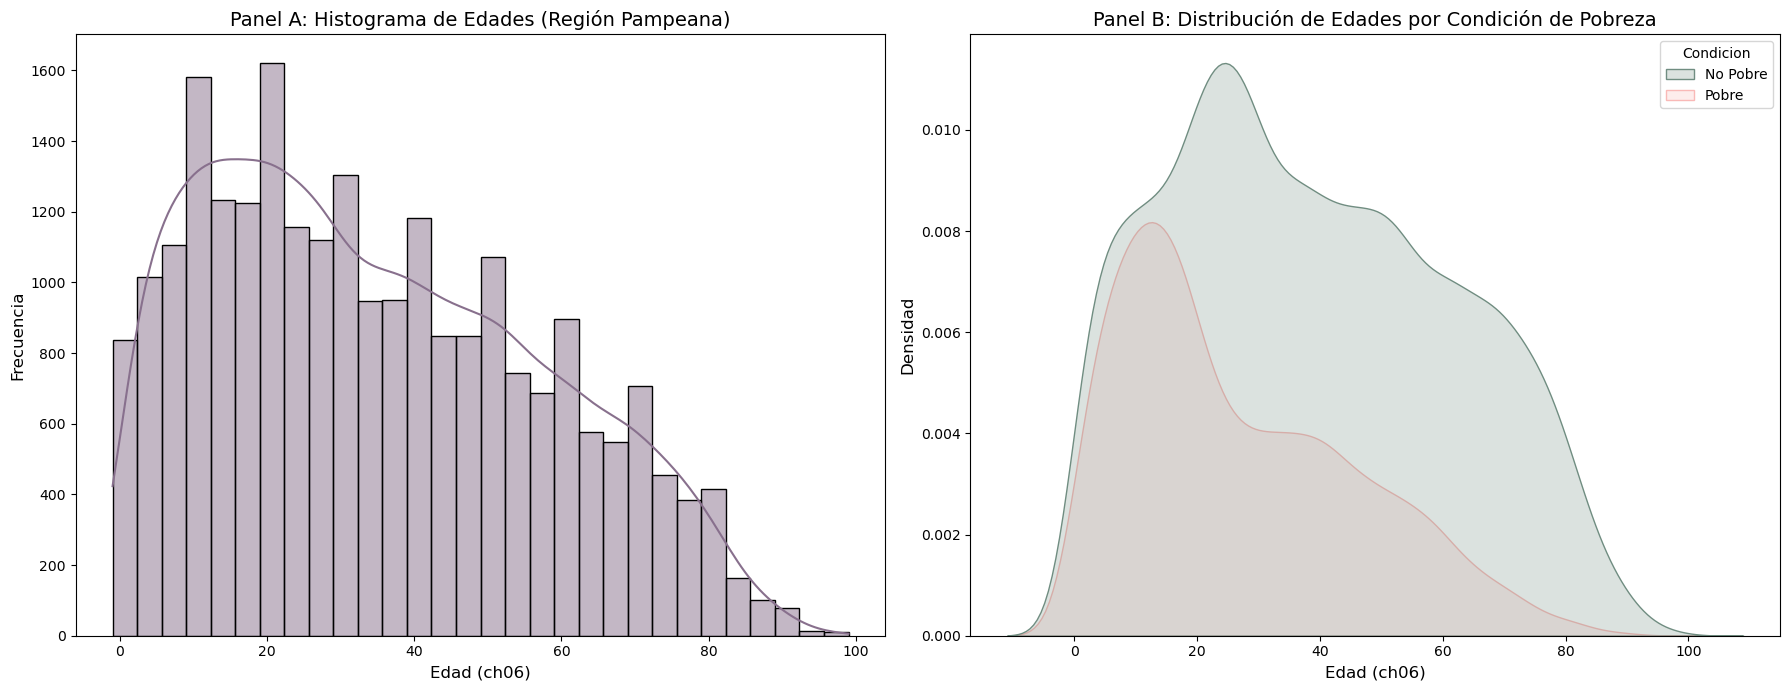

In [27]:
# Mapeamos los valores 0 y 1 de la columna 'pobre' a etiquetas de texto.
respondieron['Condicion'] = respondieron['pobre'].map({0: 'No Pobre', 1: 'Pobre'})

# Creamos la variable "edad2" (edad al cuadrado) con ch06
respondieron['edad2'] = respondieron['ch06']**2

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Panel A: Histograma de la variable edad 
sns.histplot(data=respondieron, x='ch06', bins=30, ax=axes[0], color='#88708D', kde=True)
axes[0].set_title('Panel A: Histograma de Edades (Región Pampeana)', fontsize=14)
axes[0].set_xlabel('edad2', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Panel B: Distribución de kernels para pobres y no pobres 
sns.kdeplot(data=respondieron, x='edad2', hue='Condicion', ax=axes[1], fill=True, 
            palette={'No Pobre': '#708D81', 'Pobre': '#F9B9B7'}) # Verde para No Pobre, Rojo/Rosa para Pobre
axes[1].set_title('Panel B: Distribución de Edades por Condición de Pobreza', fontsize=14)
axes[1].set_xlabel('edad2', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)

plt.tight_layout()
plt.show()

In [28]:
#EJERCICIO 2

In [29]:
#con este diccionario, vamos a definir los distitnos grados de educación
mapa_educ_anos = {
    1: 4,   # Primaria Incompleta (promedio de años)
    2: 7,   # Primaria Completa
    3: 10,  # Secundaria Incompleta (7 prim + 3 sec)
    4: 12,  # Secundaria Completa
    5: 14,  # Superior Univ. Incompleta (12 sec + 2 univ)
    6: 17,  # Superior Univ. Completa (12 sec + 5 carrera)
    7: 0    # Sin instrucción
}

# Aplicamos el mapeo a la columna 'nivel_ed' para crear la nueva variable 'educ'
# Usamos el DataFrame 'respondieron' que ya excluye los hogares sin respuesta de ingreso.
respondieron['educ'] = respondieron['nivel_ed'].map(mapa_educ_anos)

# Estadística descriptiva
estadisticas_educ = respondieron['educ'].describe()[['mean', 'std', 'min', '50%', 'max']]

print("-"*65)
print("--- Estadísticas Descriptivas para Años de Educación ('educ') ---")
print(estadisticas_educ)
print("-"*65)

-----------------------------------------------------------------
--- Estadísticas Descriptivas para Años de Educación ('educ') ---
mean     9.208178
std      4.844356
min      0.000000
50%     10.000000
max     17.000000
Name: educ, dtype: float64
-----------------------------------------------------------------


In [30]:
#EJERCICIO 3

In [31]:
# Vamos a ajustar precios 2005 a 2025
#Factor de Inflación = IPC (1er Trimestre 2025) (365.18) / IPC (1er Trimestre 2005)(10.8)
factor_inflacion = 33.81

# Creamos la nueva columna 'itf_ajustado' en el DataFrame 'respondieron'
respondieron['itf_ajustado'] = np.where(
    respondieron['anio'] == 2005,
    respondieron['itf'] * factor_inflacion,
    respondieron['itf']
)

# Definimos la línea de pobreza de referencia del TP1
linea_pobreza_2025 = 365177

# Creamos la columna 'Condicion' para el gráfico del Panel B
respondieron['Condicion'] = respondieron['pobre'].map({0: 'No Pobre', 1: 'Pobre'})

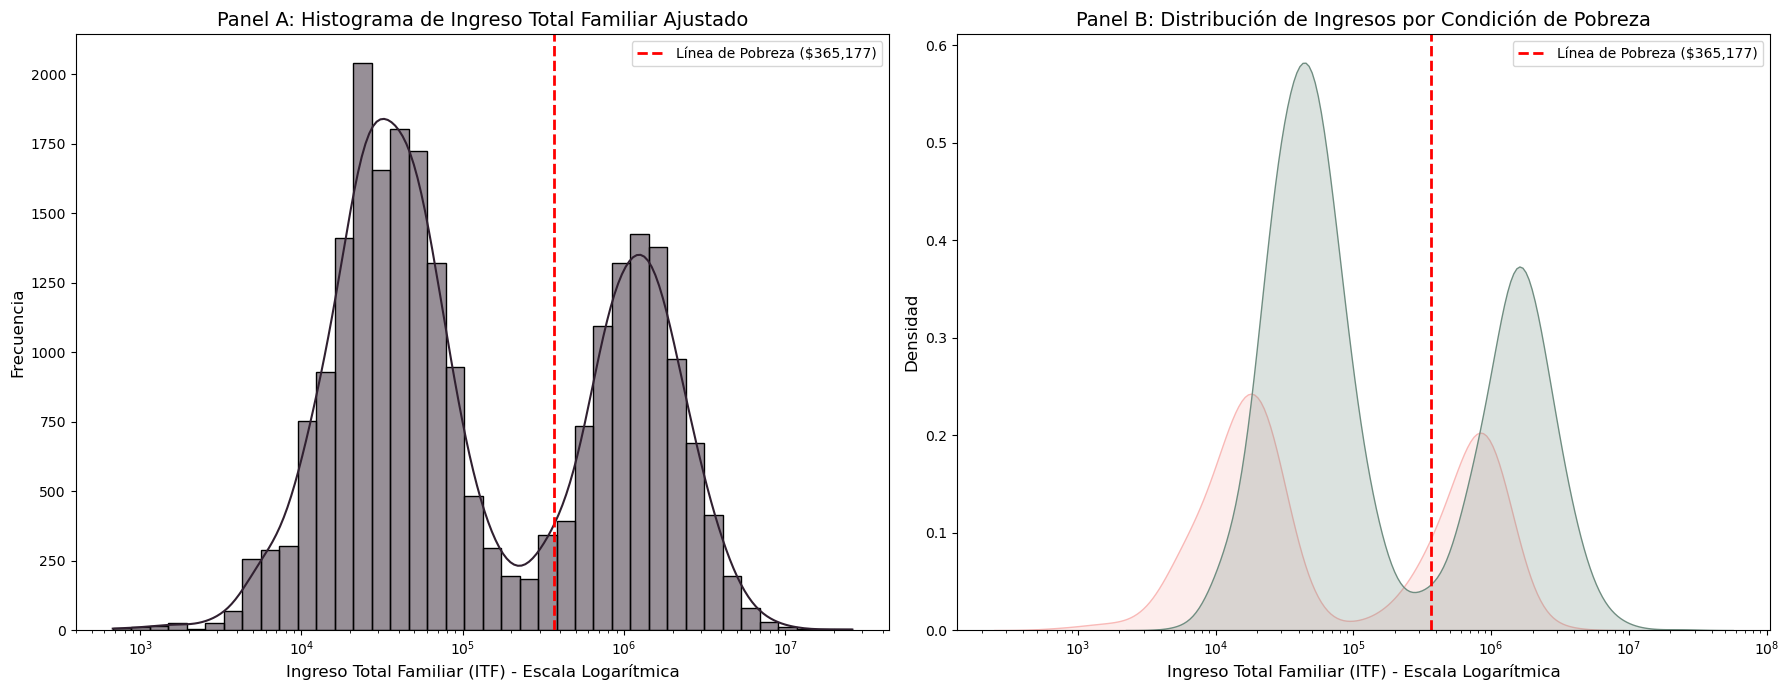

In [32]:
#Graficos ahora
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Panel A: Histograma del Ingreso Total Familiar Ajustado
sns.histplot(data=respondieron, x='itf_ajustado', bins=40, ax=axes[0], color='#302030', log_scale=True, kde=True)
axes[0].axvline(x=linea_pobreza_2025, color='red', linestyle='--', linewidth=2, label=f'Línea de Pobreza (${linea_pobreza_2025:,.0f})')
axes[0].set_title('Panel A: Histograma de Ingreso Total Familiar Ajustado', fontsize=14)
axes[0].set_xlabel('Ingreso Total Familiar (ITF) - Escala Logarítmica', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].legend()

# Panel B: Distribución de Kernels para Pobres y No Pobres 
sns.kdeplot(data=respondieron, x='itf_ajustado', hue='Condicion', ax=axes[1], fill=True, 
            log_scale=True, palette={'No Pobre': '#708D81', 'Pobre': '#F9B9B7'})
axes[1].axvline(x=linea_pobreza_2025, color='red', linestyle='--', linewidth=2, label=f'Línea de Pobreza (${linea_pobreza_2025:,.0f})')
axes[1].set_title('Panel B: Distribución de Ingresos por Condición de Pobreza', fontsize=14)
axes[1].set_xlabel('Ingreso Total Familiar (ITF) - Escala Logarítmica', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

In [33]:
#EJERCICIO 4

In [34]:
# Filtramos solo los jefes de hogar (ch03 == 1)
jefes_hogar = EPH_total[EPH_total['ch03'] == 1].copy()

# Sumamos las horas trabajadas e imputamos a los NAS el valor 0
jefes_hogar['horastrab'] = jefes_hogar['pp3e_tot'].fillna(0) + jefes_hogar['pp3f_tot'].fillna(0)

In [35]:
# Filtramos de nuevo solo los jefes de hogar (ch03 == 1)
jefes_hogar = EPH_total[EPH_total['ch03'] == 1].copy()

# Sumamos las horas trabajadas
jefes_hogar['horastrab'] = jefes_hogar['pp3e_tot'].fillna(0) + jefes_hogar['pp3f_tot'].fillna(0)

# Filtramos valores fuera de rango
jefes_hogar = jefes_hogar[(jefes_hogar['horastrab'] >= 0) & (jefes_hogar['horastrab'] <= 200)]

# Estadísticas descriptivas
estadisticas_horastrab = jefes_hogar['horastrab'].describe()
#Tablita
print("--- Estadísticas Descriptivas para Horas Trabajadas ('horastrab') ---")
print(f"Promedio: {estadisticas_horastrab['mean']:.2f} horas")
print(f"Desviación Estándar (sd): {estadisticas_horastrab['std']:.2f} horas")
print(f"Mínimo (min): {estadisticas_horastrab['min']:.2f} horas")
print(f"Percentil 50 (p50): {estadisticas_horastrab['50%']:.2f} horas")
print(f"Máximo (max): {estadisticas_horastrab['max']:.2f} horas")

--- Estadísticas Descriptivas para Horas Trabajadas ('horastrab') ---
Promedio: 24.83 horas
Desviación Estándar (sd): 39.25 horas
Mínimo (min): 0.00 horas
Percentil 50 (p50): 20.00 horas
Máximo (max): 1998.00 horas


In [36]:
#EJERCICIO 5

In [37]:
print("-" * 30)
# Cantidad de observaciones
# Usamos el DataFrame 'EPH_total', que es la base unificada final.
obs_total = EPH_total.shape[0]
obs_2005 = EPH_total[EPH_total['anio'] == 2005].shape[0]
obs_2025 = EPH_total[EPH_total['anio'] == 2025].shape[0]
print("Cantidad de observaciones 2005:",obs_2005)
print("Cantidad de observaciones 2025:",obs_2025)
print("Total", obs_2005+obs_2025)
print("-" * 30)

# Cantidad de observaciones con NAs en la variable "Pobre"
nas_total = norespondieron.shape[0]
nas_2005 = norespondieron[norespondieron['anio'] == 2005].shape[0]
nas_2025 = norespondieron[norespondieron['anio'] == 2025].shape[0]
print("Cantidad de NAs 2005:",nas_2005)
print("Cantidad de NAs 2025:",nas_2025)
print("Total", nas_2005+nas_2025)
print("-" * 30)

# Cantidad de Pobres 
# Usamos el DataFrame 'respondieron', que contiene la variable 'pobre'.
# 'Pobre' == 1
pobres_total = respondieron['pobre'].sum()
pobres_2005 = respondieron[respondieron['anio'] == 2005]['pobre'].sum()
pobres_2025 = respondieron[respondieron['anio'] == 2025]['pobre'].sum()
print("Cantidad de pobres 2005:",pobres_2005)
print("Cantidad de pobres 2025:", pobres_2025)
print("Total", pobres_2005+pobres_2025)
print("-" * 30)

# Cantidad de No Pobres 
# 'Pobre' == 0
no_pobres_total = (respondieron['pobre'] == 0).sum()
no_pobres_2005 = (respondieron[respondieron['anio'] == 2005]['pobre'] == 0).sum()
no_pobres_2025 = (respondieron[respondieron['anio'] == 2025]['pobre'] == 0).sum()
print("Cantidad de no pobres 2005:",no_pobres_2005)
print("Cantidad de no pobres 2025:",no_pobres_2025)
print("Total", no_pobres_2005+no_pobres_2025)
print("-" * 30)

# Cantidad de variables limpias y homogeneizadas 
variables_total = EPH_total.shape[1]
print("Variables total:",variables_total)
print("-" * 30)

------------------------------
Cantidad de observaciones 2005: 14651
Cantidad de observaciones 2025: 11698
Total 26349
------------------------------
Cantidad de NAs 2005: 170
Cantidad de NAs 2025: 2358
Total 2528
------------------------------
Cantidad de pobres 2005: 4264
Cantidad de pobres 2025: 3256
Total 7520
------------------------------
Cantidad de no pobres 2005: 10217
Cantidad de no pobres 2025: 6084
Total 16301
------------------------------
Variables total: 19
------------------------------


In [38]:
#PARTE 2. A

In [39]:
#EJERCICIO 1
# Calcular número de miembros en el hogar
respondieron["ix_tot"] = respondieron.groupby("codusu")["codusu"].transform("size")

# Revisar
respondieron[["codusu", "ix_tot"]].head(10)

,codusu,ix_tot
0,125082,3
1,125082,3
2,125082,3
3,125283,4
4,125283,4
5,125283,4
6,125283,4
7,125409,3
8,125409,3
9,125409,3


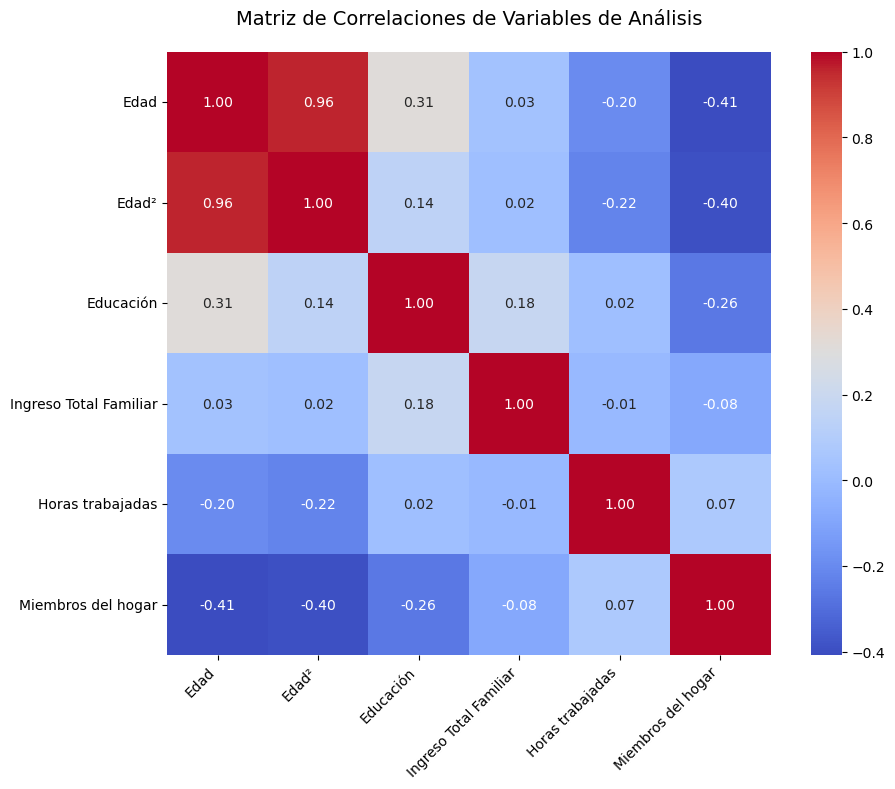

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Factor de inflación 2005 → 2025
factor_inflacion = 33.81
respondieron['itf_ajustado'] = np.where(
    respondieron['anio'] == 2005,
    respondieron['itf'] * factor_inflacion,
    respondieron['itf'])
# Renombrar columnas para la matriz
df_analisis = respondieron[['ch06', 'edad2', 'educ', 'itf_ajustado', 'horastrab', 'ix_tot']].copy()
df_analisis.rename(columns={'ch06':'Edad', 
                            'edad2':'Edad²', 
                            'educ':'Educación', 
                            'itf_ajustado':'Ingreso Total Familiar', 
                            'horastrab':'Horas trabajadas', 
                            'ix_tot':'Miembros del hogar'}, inplace=True)
# Matriz de correlaciones
corr = df_analisis.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
# Ajustes de etiquetas y título
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Matriz de Correlaciones de Variables de Análisis', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

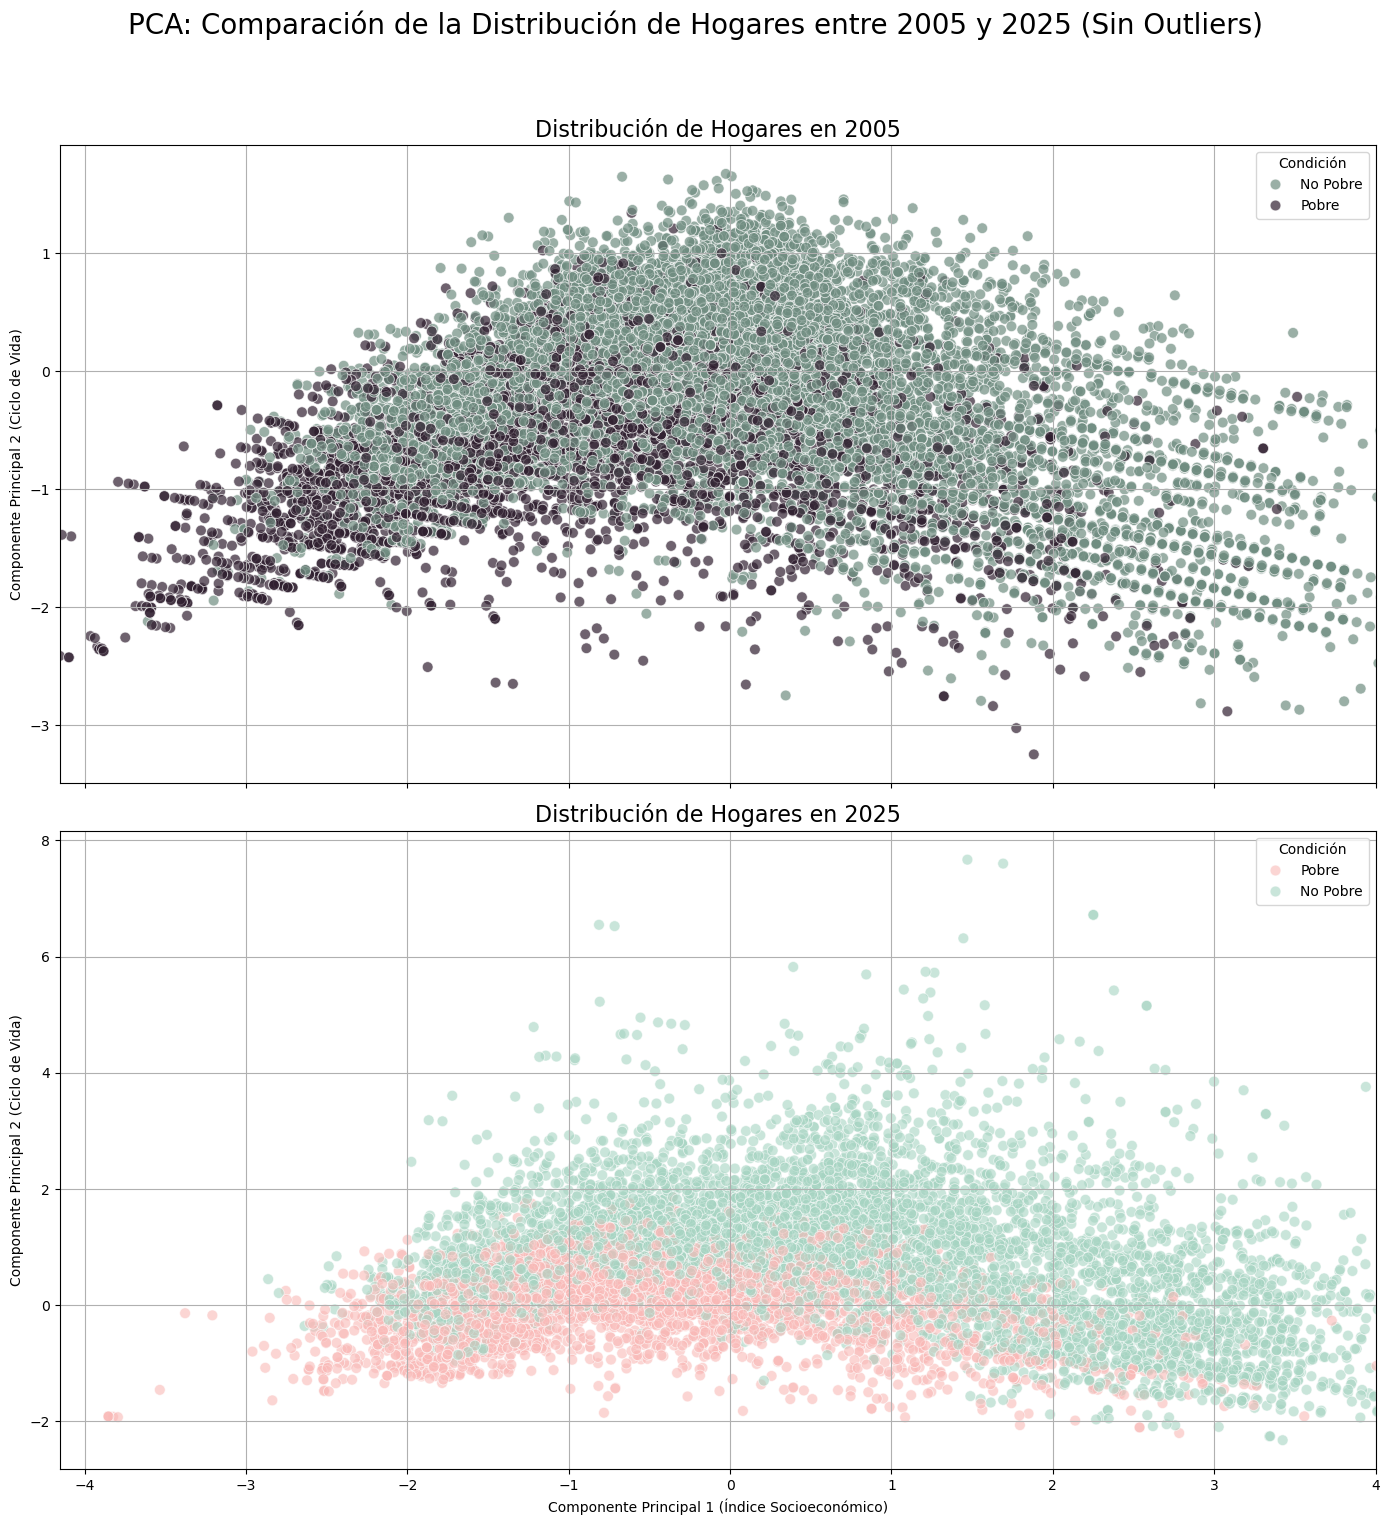

Nota: Se excluyeron 22 hogares con características atípicas de ambos gráficos.


In [73]:
#EJERCICIO 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame base con los scores de los dos primeros componentes
df_scores = pd.DataFrame(scores[:, :2], columns=['PC1', 'PC2'])

# Añadir las columnas 'Condicion' y 'Año' del DataFrame 'respondieron'
df_scores['Condicion'] = respondieron['Condicion'].values
df_scores['Año'] = respondieron['anio'].values

# Identificar y crear un nuevo DataFrame filtrado para excluir los outliers
df_scores_filtrado = df_scores[df_scores['PC2'] < 8]

# 2 filas, 1 columna. Ajustamos el tamaño para que sea más alto que ancho.
fig, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True) # sharex para ejes X comparables

# Panel Superior: Gráfico para el año 2005
sns.scatterplot(
    ax=axes[0], 
    data=df_scores_filtrado[df_scores_filtrado['Año'] == 2005],
    x='PC1', 
    y='PC2', 
    hue='Condicion', 
    palette={'No Pobre': '#708D81', 'Pobre': '#302030'},
    alpha=0.7, 
    edgecolor='w', 
    s=60)

axes[0].set_title('Distribución de Hogares en 2005', fontsize=16)
axes[0].set_ylabel('Componente Principal 2 (Ciclo de Vida)')
axes[0].grid(True)
axes[0].legend(title='Condición')

# Limitamos el eje X del gráfico superior
axes[0].set_xlim(left=df_scores_filtrado['PC1'].min(), right=4) 

# Panel Inferior: Gráfico para el año 2025
sns.scatterplot(
    ax=axes[1], 
    data=df_scores_filtrado[df_scores_filtrado['Año'] == 2025],
    x='PC1', 
    y='PC2', 
    hue='Condicion', 
    palette={'No Pobre': '#A6D4C2', 'Pobre': '#F9B9B7'},
    alpha=0.6, 
    edgecolor='w', 
    s=60)

axes[1].set_title('Distribución de Hogares en 2025', fontsize=16)
axes[1].set_xlabel('Componente Principal 1 (Índice Socioeconómico)')
axes[1].set_ylabel('Componente Principal 2 (Ciclo de Vida)')
axes[1].grid(True)
axes[1].legend(title='Condición')

#  Título general y ajuste
plt.suptitle('PCA: Comparación de la Distribución de Hogares entre 2005 y 2025 (Sin Outliers)', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print(f"Nota: Se excluyeron {df_scores.shape[0] - df_scores_filtrado.shape[0]} hogares con características atípicas de ambos gráficos.")

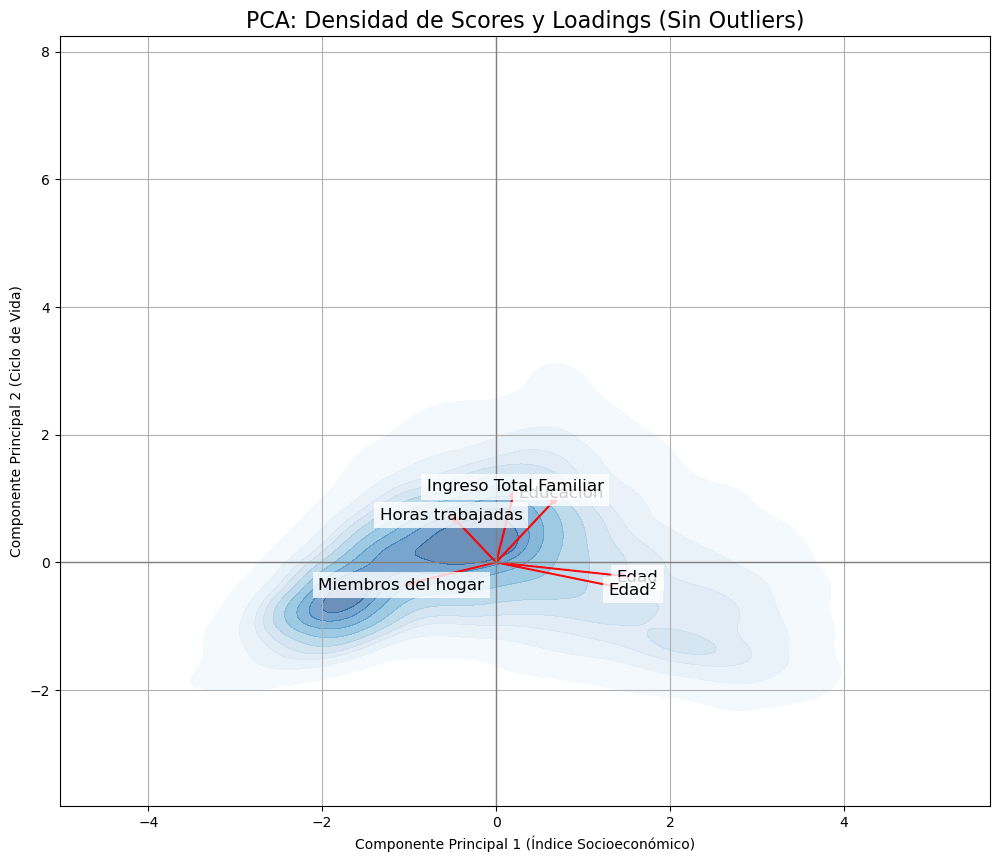

Nota: Se excluyeron 22 hogares con características atípicas para mejorar la visualización.


In [79]:
#EJERCICIO 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Primero, creamos un DataFrame con los scores
df_scores_densidad = pd.DataFrame(scores[:, :2], columns=['PC1', 'PC2'])

# Ahora, filtramos los outliers para mejorar la visualización
# Mantenemos solo los puntos donde el Componente 2 es menor a 8
df_scores_densidad_filtrado = df_scores_densidad[df_scores_densidad['PC2'] < 8]

# GRÁFICO MEJORADO: Densidad de Scores (filtrado) y Loadings
# Extraemos los loadings para las flechas
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
scale_factor = 1.5 # Factor para que las flechas se vean mejor
plt.figure(figsize=(12, 10))

# Graficamos la DENSIDAD usando el DataFrame FILTRADO
sns.kdeplot(data=df_scores_densidad_filtrado, x='PC1', y='PC2', cmap="Blues", fill=True, alpha=0.6)

# Graficamos los loadings (flechas) encima, como antes
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0] * scale_factor, loadings[i, 1] * scale_factor, 
              color='r', alpha=0.9, width=0.01, head_width=0.08)
    plt.text(loadings[i, 0] * scale_factor * 1.15, loadings[i, 1] * scale_factor * 1.15, 
             df_analisis.columns[i], color='k', ha='center', va='center', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
plt.xlabel('Componente Principal 1 (Índice Socioeconómico)')
plt.ylabel('Componente Principal 2 (Ciclo de Vida)')
plt.title('PCA: Densidad de Scores y Loadings (Sin Outliers)', fontsize=16)
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()
print(f"Nota: Se excluyeron {len(scores) - len(df_scores_densidad_filtrado)} hogares con características atípicas para mejorar la visualización.")

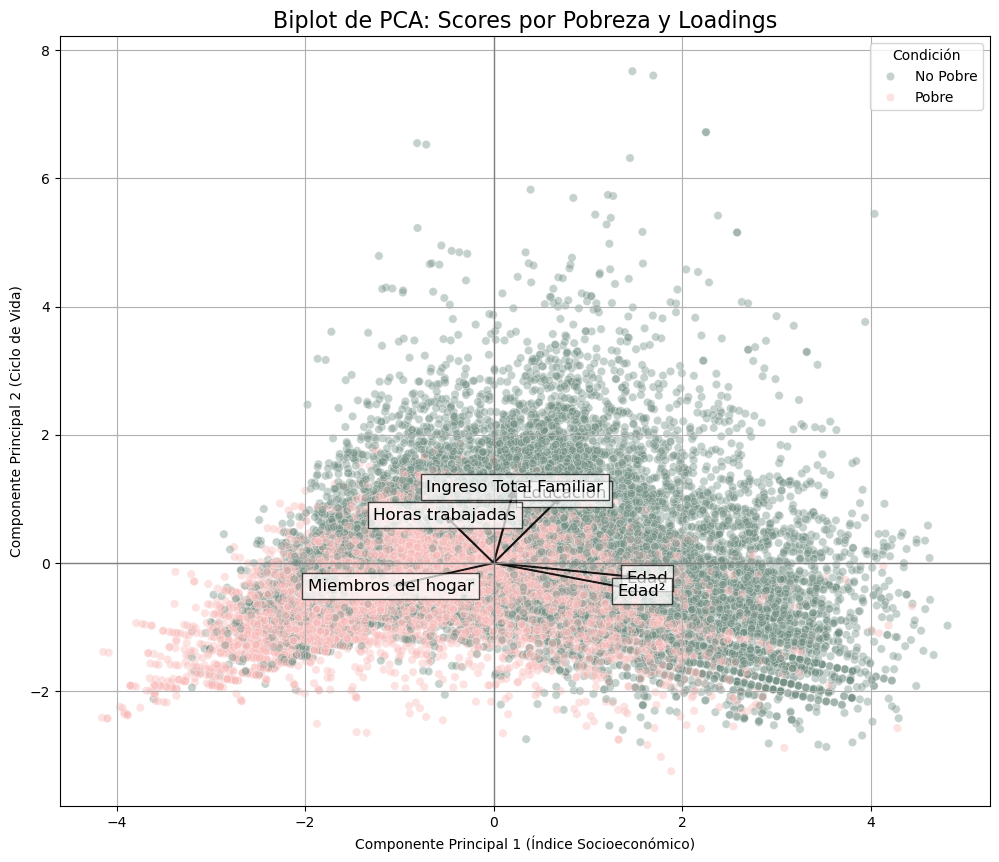

In [80]:
#EJERCICIO 3
import seaborn as sns

# Preparamos DataFrame con scores y la condición de pobreza
df_scores_biplot = pd.DataFrame(scores[:, :2], columns=['PC1', 'PC2'])
df_scores_biplot['Condicion'] = respondieron['Condicion'].values

# Filtramos outliers para que el gráfico no se comprima
df_scores_biplot_filtrado = df_scores_biplot[df_scores_biplot['PC2'] < 8]
plt.figure(figsize=(12, 10))

# Grafico los scores coloreados por condición
sns.scatterplot(data=df_scores_biplot_filtrado, x='PC1', y='PC2', hue='Condicion',
                palette={'No Pobre': '#708D81', 'Pobre': '#F9B9B7'}, alpha=0.4)

# Grafico los loadings (flechas) encima
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0] * scale_factor, loadings[i, 1] * scale_factor, 
              color='black', alpha=0.8, width=0.01, head_width=0.08)
    plt.text(loadings[i, 0] * scale_factor * 1.15, loadings[i, 1] * scale_factor * 1.15, 
             df_pca.columns[i], color='k', ha='center', va='center', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='k'))
plt.xlabel('Componente Principal 1 (Índice Socioeconómico)')
plt.ylabel('Componente Principal 2 (Ciclo de Vida)')
plt.title('Biplot de PCA: Scores por Pobreza y Loadings', fontsize=16)
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.legend(title='Condición')
plt.show()

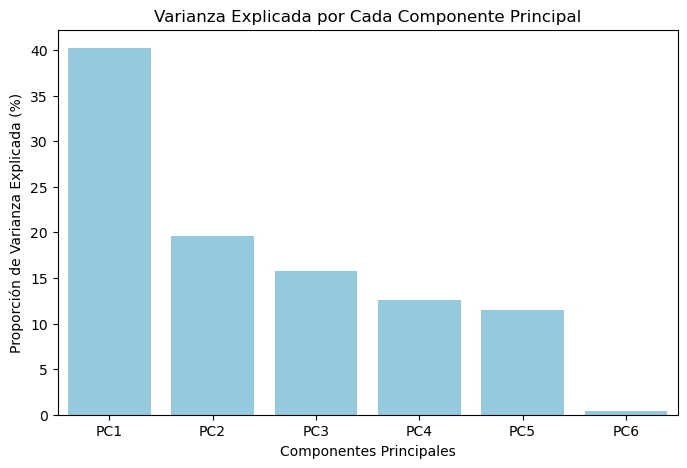

In [81]:
#EJERCICIO 4
# Varianza explicada
var_explicada = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(var_explicada))], y=var_explicada*100, color='skyblue')
plt.ylabel('Proporción de Varianza Explicada (%)')
plt.xlabel('Componentes Principales')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

In [ ]:
#PARTE 2. B

In [ ]:
#EJERCICIO 5 A

In [ ]:
#Importamos librerías para hacer los clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definimos las variables de interés
X = respondieron[["ch06", "itf_ajustado"]]

# Función para graficar resultados de clustering
def plot_kmeans(X, k, n_init=20): 
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
    labels = kmeans.fit_predict(X)
    
    plt.figure(figsize=(6,5)) #Colores y dimensiones de los gráficos
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap="coolwarm", s=30, alpha=0.6) 
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                c="red", marker="X", s=200, label="Centroides")
    plt.xlabel("Edad") #Etiqueta eje X
    plt.ylabel("Ingreso Total Familiar") #Etiqueta eje Y
    plt.title(f"K-Means con k={k}") #Título de nuestro gráfico
    plt.legend()
    plt.show()
    
    return labels

# Ejecutamos con k=2, k=4 y k=10
etiqueta_k2 = plot_kmeans(X, k=2)
etiqueta_k4 = plot_kmeans(X, k=4)
etiqueta_k10 = plot_kmeans(X, k=10)

In [ ]:
#EJERCICIO 5 B

In [ ]:
#Como medida de desimilitud vamos a utilizar una Inercia
#Importamos las librerias
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecciónamos las variables de interés
X = respondieron[["ch06", "itf_ajustado"]].dropna()

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculamos la inercia para k=1 a k=10
inertias = []
ks = range(1, 11)

#Le damos los parámetros a la figura
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficamos el Elbow
plt.figure(figsize=(6,4))
plt.plot(ks, inertias, marker="o")
plt.xlabel("Número de clusters (k)") #Etiqueta eje X
plt.ylabel("Inercia (WCSS)") #Etiqueta eje Y
plt.title("Método del Elbow") #Título del gráfico
plt.grid(alpha=0.3)
plt.show()

In [ ]:
#EJERCICIO 6

In [ ]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Elegimos el data frame
for _cand in ["jefes_hogar", "respondieron", "base", "df"]:
    if _cand in globals():
        df = globals()[_cand].copy()
        break
else:
    raise NameError("No encuentro un DataFrame (jefes_hogar / respondieron / base / df). Cargá uno en memoria.")

# Coercionar todo lo numérico posible
for c in df.columns:
    if df[c].dtype == "O":
        df[c] = pd.to_numeric(df[c], errors="ignore")

cols_lower = {c.lower(): c for c in df.columns}

def find_by_substr(required_terms, avoid_terms=None):
    """
    Busca una columna que contenga TODOS los substrings de required_terms.
    Si avoid_terms se pasa, debe NO contener ninguno de esos substrings.
    Devuelve el nombre real de la columna o None.
    """
    req = [t.lower() for t in (required_terms if isinstance(required_terms, (list,tuple)) else [required_terms])]
    avoid = [t.lower() for t in (avoid_terms if isinstance(avoid_terms, (list,tuple)) else ([] if avoid_terms is None else [avoid_terms]))]
    for lc, real in cols_lower.items():
        if all(t in lc for t in req) and all(t not in lc for t in avoid):
            return real
    return None

def first_present(candidates):
    """Devuelve la primera columna existente (case-insensitive) en candidates, o None."""
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols_lower[cand.lower()]
    return None

used = {}    # para registrar qué columnas se usaron

#Busca las variables edad y edad2 para utilizar
edad_col = first_present(["edad","ch06"])
if edad_col is None:
    # última chance: algo que contenga 'edad'
    edad_col = find_by_substr(["edad"])
if edad_col is None:
    raise KeyError("No encontré columna de edad (pruebo con 'edad' o 'ch06').")

df["edad2"] = pd.to_numeric(df[edad_col], errors="coerce") ** 2
used["edad"] = edad_col
used["edad2"] = "edad2"

#Busca la variable educación para utilizar
educ_col = first_present(["educ","anios_educ","años_educ","anios_de_educacion","ch14"])
if educ_col is None:
    educ_col = find_by_substr(["educ"])
if educ_col is None:
    raise KeyError("No encontré columna de educación (p.ej. 'educ' o 'ch14').")
used["educ"] = educ_col

#Busca la variable Ingreso Total para utilizar
itf_col = first_present(["itf","itf_ajustado","ingreso_total_familiar","ingreso_familiar","ingreso_hogar","ii_fami"])
if itf_col is None:
    itf_col = find_by_substr(["ingreso","fami"]) or find_by_substr(["itf"])
if itf_col is None:
    raise KeyError("No encontré ITF/ingreso familiar (p.ej. 'itf' o 'ingreso_total_familiar').")
used["itf"] = itf_col

#Busca la variable miembros del hogar para utilizar
hh_col = first_present(["miembros_hogar","ix_tot","ix_tot.","ix_totales","cant_miembros","IX_TOT","IX_Tot"])
if hh_col is None:
    hh_col = find_by_substr(["ix","tot"]) or find_by_substr(["miembros","hogar"])
if hh_col is None:
    raise KeyError("No encontré 'miembros_hogar' / 'IX_TOT'.")
used["miembros_hogar"] = hh_col

#Busca la variable horas trabajadas para utilizar
horas_col = first_present(["horastrab","horas_trab","hs_trab","horas"])
if horas_col is None:
    #sumo PP3E_TOT + PP3F_TOT si existen
    pp3e = first_present(["PP3E_TOT","pp3e_tot","pp3e"]) or find_by_substr(["pp3e"])
    pp3f = first_present(["PP3F_TOT","pp3f_tot","pp3f"]) or find_by_substr(["pp3f"])
    if (pp3e is not None) or (pp3f is not None):
        df["horastrab"] = df.get(pp3e, 0).fillna(0) + df.get(pp3f, 0).fillna(0)
        horas_col = "horastrab"
    else:
        horas_col = find_by_substr(["hora","trab"])
        if horas_col is None:
            #si no hay nada, creo NaN y sigo; luego dropna limpiará filas sin horas
            df["horastrab"] = np.nan
            horas_col = "horastrab"

used["horastrab"] = horas_col

# Armamos la matriz
vars_target = [edad_col, "edad2", educ_col, itf_col, hh_col, horas_col]
# Convertir a numérico y limpiar inf/na
for c in vars_target:
    df[c] = pd.to_numeric(df[c], errors="coerce")
X = df[vars_target].replace([np.inf, -np.inf], np.nan).dropna()

# Si quedó vacío, reportar qué faltó
if X.empty:
    faltantes = {k:v for k,v in used.items() if v is None}
    raise ValueError(f"No quedaron filas después de dropna(). Revisá NAs/columnas. Mapeo usado: {used}")

#Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizamos un muestreo
MAX_N = 8000  #Elegimos cuan grande queremos que sea la muestra
if X_scaled.shape[0] > MAX_N:
    sample_idx = np.random.RandomState(42).choice(X_scaled.shape[0], size=MAX_N, replace=False)
    X_scaled_plot = X_scaled[sample_idx]
    sample_note = f" (muestreadas {MAX_N} de {X_scaled.shape[0]} obs)"
else:
    X_scaled_plot = X_scaled
    sample_note = ""

#Realizamos el clustering jerárquico y dendrograma
Z = linkage(X_scaled_plot, method="ward")

plt.figure(figsize=(12, 6)) #Parámetros de la figura
dendrogram(Z, truncate_mode="level", p=4, show_leaf_counts=True) #Nos da un punto de corte del dendograma y le agrega etiquetas
plt.title("Dendrograma - Clustering Jerárquico (Ward)" + sample_note) #Título del dendograma
plt.xlabel("Clusters agregados") #Título del eje x
plt.ylabel("Distancia (varianza intra-cluster)") #Titulo del eje y
plt.tight_layout()
plt.show()

In [ ]:
#EJERCICIO 7

In [ ]:
#K=2
#Importamos las librerías
pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np

# Seleccionamos las variables continuas y categóricas que usaremos como predictores.
variables_continuas = ['ch06', 'educ', 'ipcf', 'horastrab', 'miembros_hogar'] 
variables_categoricas = ['ch04', 'ch07', 'ch08', 'cat_ocup'] 

# Creamos el DataFrame de características. Usamos el dataframe 'respondieron' que ya fue limpiado. 
df_kmeans = respondieron[variables_continuas + variables_categoricas].dropna()

# Creamos las variables "dummy" para las categóricas
df_dummies = pd.get_dummies(df_kmeans, columns=variables_categoricas, drop_first=True)

# Separamos las características (X) de la etiqueta real que queremos predecir (y)
X = df_dummies
y = respondieron.loc[df_kmeans.index]['pobre'] 

# Estandarizamos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Ejecutar el Algoritmo K-Means 
kmeans = KMeans(n_clusters=2, random_state=10, n_init='auto')
kmeans.fit(X_scaled)

# Obtenemos las etiquetas que K-Means asignó a cada cluster
cluster_labels = kmeans.labels_

# Realizamos el gráfico
df_plot = respondieron.loc[X.index, ['ch06', 'itf']].copy()
df_plot['Cluster'] = cluster_labels

# Graficamos los resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='ch06', y='itf', hue='Cluster', palette='viridis', alpha=0.7, s=20)

plt.title('K-Means (k=2) - Visualización Edad vs. ITF por Clúster', fontsize=16)
plt.xlabel('Edad (ch06)', fontsize=12)
plt.ylabel('Ingreso Total Familiar (ITF)', fontsize=12)
plt.legend(title='Clúster Asignado')
plt.grid(True)
plt.show()

In [ ]:
#K=4
#Seleccionamos las variables continuas y categóricas que usaremos como predictores
variables_continuas = ['ch06', 'educ', 'ipcf', 'horastrab', 'miembros_hogar']
variables_categoricas = ['ch04', 'ch07', 'ch08', 'cat_ocup'] 

# Creamos el DataFrame de características. Usamos el dataframe 'respondieron' que ya fue limpiado
df_kmeans = respondieron[variables_continuas + variables_categoricas].dropna()

# Creamos las variables "dummy" para las categóricas
df_dummies = pd.get_dummies(df_kmeans, columns=variables_categoricas, drop_first=True)

# Separamos las características (X) de la etiqueta real que queremos predecir (y)
X = df_dummies
y = respondieron.loc[df_kmeans.index]['pobre'] # La variable 'pobre' es nuestra "verdad" para comparar

# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ejecutamos el Algoritmo K-Means
kmeans = KMeans(n_clusters=4, random_state=10, n_init='auto')
kmeans.fit(X_scaled)

# Obtenemos las etiquetas que K-Means asignó a cada cluster
cluster_labels = kmeans.labels_

#Realizamos el gráfico
df_plot = respondieron.loc[X.index, ['ch06', 'itf']].copy()
df_plot['Cluster'] = cluster_labels

# Graficamos los resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='ch06', y='itf', hue='Cluster', palette='viridis', alpha=0.7, s=20)

plt.title('K-Means (k=4) - Visualización Edad vs. ITF por Clúster', fontsize=16) #Título del gráfico
plt.xlabel('Edad (ch06)', fontsize=12) #Etiqueta eje X
plt.ylabel('Ingreso Total Familiar (ITF)', fontsize=12) #Etiqueta eje Y
plt.legend(title='Clúster Asignado')
plt.grid(True)
plt.show()

In [ ]:
#K=10
#Seleccionamos las variables continuas y categóricas que usaremos como predictores
variables_continuas = ['ch06', 'educ', 'ipcf', 'horastrab', 'miembros_hogar']
variables_categoricas = ['ch04', 'ch07', 'ch08', 'cat_ocup'] 

# Creamos el DataFrame de características. Usamos el dataframe 'respondieron' que ya fue limpiado
df_kmeans = respondieron[variables_continuas + variables_categoricas].dropna()

# Creamos las variables "dummy" para las categóricas.
df_dummies = pd.get_dummies(df_kmeans, columns=variables_categoricas, drop_first=True)

# Separamos las características (X) de la etiqueta real que queremos predecir (y)
X = df_dummies
y = respondieron.loc[df_kmeans.index]['pobre'] # La variable 'pobre' es nuestra "verdad" para comparar

# Estandarizamos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Ejecutamos el Algoritmo K-Means
kmeans = KMeans(n_clusters=10, random_state=10, n_init='auto')
kmeans.fit(X_scaled)

# Obtenemos las etiquetas que K-Means asignó a cada cluster
cluster_labels = kmeans.labels_

# Visualización del gráfico
df_plot = respondieron.loc[X.index, ['ch06','itf']].copy()
df_plot['Cluster'] = cluster_labels.astype(str)  # tratar como categórico

import seaborn as sns
import matplotlib.pyplot as plt

#Graficamos los resultados
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_plot,
    x='ch06', y='itf',
    hue='Cluster',
    hue_order=sorted(df_plot['Cluster'].unique(), key=int),
    palette=sns.color_palette('tab10', n_colors=10), #Colores
    alpha=0.7, s=20, legend='full'
)
plt.title('K-Means (k=10) - Edad vs. ITF por Clúster') #Título del gráfico
plt.xlabel('Edad (ch06)'); plt.ylabel('Ingreso Total Familiar (ITF)') #Etiqueta eje X
plt.legend(title='Clúster', ncol=2, bbox_to_anchor=(1.02, 1), loc='upper left') #Etiqueta eje Y
plt.tight_layout()
plt.show()

In [3]:
#ACA 